In [1]:
#"Forward Stepwise Regression: Wine Quality Data—fwdStepwiseWine.py"
import numpy as np
from sklearn import datasets, linear_model
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.debugger import set_trace


In [2]:
# Data Reading
df=pd.read_csv("C:\Repository\machine_laerning\winequality-red.csv")

names=df.columns.to_list()
xList=df.iloc[:,:-1].to_numpy()
labels = df.iloc[:,-1:].to_numpy()

#read data into iterable

#divide attributes and labels into training and test sets

indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0 ]
xListTrain = [xList[i] for i in indices if i%3 != 0 ]
labelsTest = [labels[i] for i in indices if i%3 == 0]
labelsTrain = [labels[i] for i in indices if i%3 != 0]


In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
def xattrSelect(x, idxSet):
    #takes X matrix and return subset containing columns in idxSet
    xOut = []
    for row in x:
        xOut.append([row[i] for i in idxSet])
    return(xOut)


In [5]:
#build list of attributes one-at-a-time - starting with empty
attributeList = []
index = range(len(xList[1]))
indexSet = set(index)
indexSeq = []
oosError = []

In [6]:
indexSet

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[10]
[0.7234259255116279]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[10, 1]
[0.7234259255116279, 0.6860993152837196]
[0, 2, 3, 4, 5, 6, 7, 8, 9]
[10, 1, 9]
[0.7234259255116279, 0.6860993152837196, 0.673436503342028]
[0, 2, 3, 4, 5, 6, 7, 8]
[10, 1, 9, 4]
[0.7234259255116279, 0.6860993152837196, 0.673436503342028, 0.6677033213897796]
[0, 2, 3, 5, 6, 7, 8]
[10, 1, 9, 4, 6]
[0.7234259255116279, 0.6860993152837196, 0.673436503342028, 0.6677033213897796, 0.662255856852227]
[0, 2, 3, 5, 7, 8]
[10, 1, 9, 4, 6, 8]
[0.7234259255116279, 0.6860993152837196, 0.673436503342028, 0.6677033213897796, 0.662255856852227, 0.6590004754154625]
[0, 2, 3, 5, 7]
[10, 1, 9, 4, 6, 8, 5]
[0.7234259255116279, 0.6860993152837196, 0.673436503342028, 0.6677033213897796, 0.662255856852227, 0.6590004754154625, 0.6572717206143075]
[0, 2, 3, 7]
[10, 1, 9, 4, 6, 8, 5, 3]
[0.7234259255116279, 0.6860993152837196, 0.673436503342028, 0.6677033213897796, 0.662255856852227, 0.6590004754154625, 0.6572717

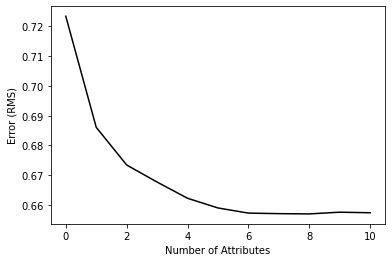

In [7]:
for i in index:
    #set_trace()
    attSet = set(attributeList)
    #attributes not in list already
    attTrySet = indexSet - attSet
    #form into list
    attTry = [ii for ii in attTrySet]
    errorList = []
    attTemp = []
    #try each attribute not in set to see which one gives least oos error
    print(attTry)
    for iTry in attTry:
        attTemp = [] + attributeList
        attTemp.append(iTry)
        #use attTemp to form training and testing sub matrices
        xTrainTemp = xattrSelect(xListTrain, attTemp)
        xTestTemp = xattrSelect(xListTest, attTemp)
        #form into numpy arrays
        xTrain = np.array(xTrainTemp); yTrain = np.array(labelsTrain)
        xTest = np.array(xTestTemp); yTest = np.array(labelsTest)
        #use sci-kit learn linear regression
        wineQModel = linear_model.LinearRegression()
        wineQModel.fit(xTrain,yTrain)
        #use trained model to generate prediction and calculate rmsError
        rmsError = np.linalg.norm((yTest-wineQModel.predict(xTest)), 2)/sqrt(len(yTest))
        errorList.append(rmsError)
        attTemp = []
    iBest = np.argmin(errorList)
    attributeList.append(attTry[iBest])
    print(attributeList)
    oosError.append(errorList[iBest])
    print(oosError)
print("Out of sample error versus attribute set size" )
print(oosError)
print("\n" + "Best attribute indices")
print(attributeList)
namesList = [names[i] for i in attributeList]
print("\n" + "Best attribute names")
print(namesList)
#Plot error versus number of attributes
x = range(len(oosError))
plt.plot(x, oosError, 'k')
plt.xlabel('Number of Attributes')
plt.ylabel('Error (RMS)')
plt.show()

In [8]:
#Plot histogram of out of sample errors for best number of attributes
#Identify index corresponding to min value,
#retrain with the corresponding attributes
#Use resulting model to predict against out of sample data.
indexBest = oosError.index(min(oosError))
attributesBest = attributeList[1:(indexBest+1)]
#Define column-wise subsets of xListTrain and xListTest convert to numpy
xTrainTemp = xattrSelect(xListTrain, attributesBest)
xTestTemp = xattrSelect(xListTest, attributesBest)
xTrain = np.array(xTrainTemp); xTest = np.array(xTestTemp)


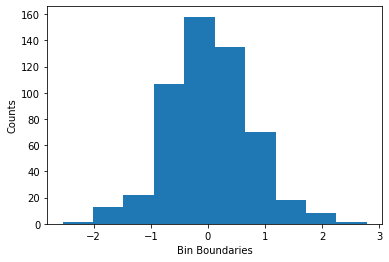

In [9]:
#train and plot error histogram
wineQModel = linear_model.LinearRegression()
wineQModel.fit(xTrain,yTrain)
errorVector = yTest-wineQModel.predict(xTest)
plt.hist(errorVector)
plt.xlabel("Bin Boundaries")
plt.ylabel("Counts")
plt.show()


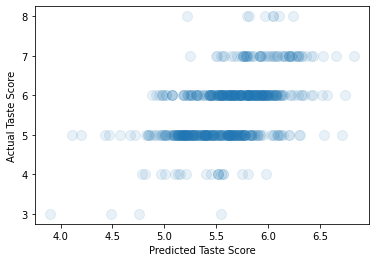

In [10]:
#scatter plot of actual versus predicted
plt.scatter(wineQModel.predict(xTest), yTest, s=100, alpha=0.10)
plt.xlabel('Predicted Taste Score')
plt.ylabel('Actual Taste Score')
plt.show()

# 



------------------LETS APPLY DIFFERENTLY AND SEE THE RESULTS-----

In [11]:
y=df.iloc[:,-1:]
X=df.iloc[:,:-1]
X_train, X_test,Y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 0,shuffle=False)

NameError: name 'train_test_split' is not defined

In [ ]:
sbs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = (1, 8),
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, Y_train)

In [ ]:
print(sbs.k_score_)
[i for i in zip(sbs.k_feature_names_,sbs.k_feature_idx_)]

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs = EFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
         min_features= 2,
          max_features= 5,
          scoring='accuracy',
          cv = None,
          n_jobs=-1
         ).fit(X_train, Y_train)
print(efs.best_feature_names_,efs.best_idx_,efs.best_score_)

In [ ]:
wineQModel = linear_model.LinearRegression()
wineQModel.fit(X_train, Y_train)
#use trained model to generate prediction and calculate rmsError
rmsError = np.linalg.norm((y_test-wineQModel.predict(X_test)), 2)/sqrt(len(y_test))

In [ ]:
print(rmsError)

In [ ]:
wineQModel.predict(X_test)

In [ ]:
wineQModel.score(X_test,y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
lr = LinearRegression()

sfs = SFS(lr, 
          k_features=(3,8), 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X_train, Y_train)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
print(sfs.k_score_)
[i for i in zip(sfs.k_feature_names_,sfs.k_feature_idx_)]

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs = EFS(lr,
         min_features= 3,
          max_features= 8,
          scoring='neg_mean_squared_error',
          cv = None,
          n_jobs=-1
         ).fit(X_train, Y_train)
print(efs.best_feature_names_,efs.best_idx_,efs.best_score_)

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs = EFS(lr,
         min_features= 3,
          max_features= 8,
          scoring='r2',
          cv = None,
          n_jobs=-1
         ).fit(X_train, Y_train)
print(efs.best_feature_names_,efs.best_idx_,efs.best_score_)

# 3.3.1.1. Common cases: predefined values
For the most common use cases, you can designate a scorer object with the scoring parameter; the table below shows all possible values. All scorer objects follow the convention that higher return values are better than lower return values. Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric.

Scoring	Function	Comment
Classification		
‘accuracy’	metrics.accuracy_score	
‘balanced_accuracy’	metrics.balanced_accuracy_score	
‘average_precision’	metrics.average_precision_score	
‘neg_brier_score’	metrics.brier_score_loss	
‘f1’	metrics.f1_score	for binary targets
‘f1_micro’	metrics.f1_score	micro-averaged
‘f1_macro’	metrics.f1_score	macro-averaged
‘f1_weighted’	metrics.f1_score	weighted average
‘f1_samples’	metrics.f1_score	by multilabel sample
‘neg_log_loss’	metrics.log_loss	requires
		predict_proba
		support
‘precision’ etc.	metrics.precision_score	suffixes apply as with ‘f1’
‘recall’ etc.	metrics.recall_score	suffixes apply as with ‘f1’
‘jaccard’ etc.	metrics.jaccard_score	suffixes apply as with ‘f1’
‘roc_auc’	metrics.roc_auc_score	
‘roc_auc_ovr’	metrics.roc_auc_score	
‘roc_auc_ovo’	metrics.roc_auc_score	
‘roc_auc_ovr_weighted’	metrics.roc_auc_score	
‘roc_auc_ovo_weighted’	metrics.roc_auc_score	
Clustering		
‘adjusted_mutual_info_score’	metrics.adjusted_mutual_info_score	
‘adjusted_rand_score’	metrics.adjusted_rand_score	
‘completeness_score’	metrics.completeness_score	
‘fowlkes_mallows_score’	metrics.fowlkes_mallows_score	
‘homogeneity_score’	metrics.homogeneity_score	
‘mutual_info_score’	metrics.mutual_info_score	
‘normalized_mutual_info_score’	metrics.normalized_mutual_info_score	
‘v_measure_score’	metrics.v_measure_score	
Regression		
‘explained_variance’	metrics.explained_variance_score	
‘max_error’	metrics.max_error	
‘neg_mean_absolute_error’	metrics.mean_absolute_error	
‘neg_mean_squared_error’	metrics.mean_squared_error	
‘neg_root_mean_squared_error’	metrics.mean_squared_error	
‘neg_mean_squared_log_error’	metrics.mean_squared_log_error	
‘neg_median_absolute_error’	metrics.median_absolute_error	
‘r2’	metrics.r2_score	
‘neg_mean_poisson_deviance’	metrics.mean_poisson_deviance	
‘neg_mean_gamma_deviance’	metrics.mean_gamma_deviance	

# multicollinearity checking 

In [ ]:
df

In [ ]:


# ### Fixing Multicollinearity - dropping variables

# In[6]:


#Copying the original dataframe
df2 = df.copy()


# In[7]:


# Dropping the features which are having high VIF values
df3 = df2.drop(['Interior(Sq Ft)','# of Rooms'], axis = 1)


# In[8]:


df3.head()


# In[9]:


#Calculating VIF scores after dropping the varaibles
def vif_scores(df3):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independant Features"] = df3.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df3.values,i) for i in range(df3.shape[1])]
    return VIF_Scores

df3 = df3.iloc[:,:-1]
vif_scores(df3)


# ### Fixing multicollinearity - Combining the variables

# In[10]:


df4= df3.copy()


# In[11]:


df4.head()


# In[12]:


#Combining the variables and calculating the VIF scores
df5 = df4.copy()



In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


#import required libraries
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


# In[2]:


# Reading the dataset of House Sales
df = pd.read_csv(r"C:\Users\user\Downloads\Fixing-Multicollinearity-master\\House Sales.csv")


# In[3]:


df.head()


# In[4]:


type(df)


# ### Calculating VIF scores for original data

# In[5]:


# Creating a function to calculate the VIF scores for all independant features with for loop


def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores

df1 = df.iloc[:,:-1]
vif_scores(df1)


# ### Fixing Multicollinearity - dropping variables

# In[6]:


#Copying the original dataframe
df2 = df.copy()


# In[7]:


# Dropping the features which are having high VIF values
df3 = df2.drop(['Interior(Sq Ft)','# of Rooms'], axis = 1)


# In[8]:


df3.head()


# In[9]:


#Calculating VIF scores after dropping the varaibles
def vif_scores(df3):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independant Features"] = df3.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df3.values,i) for i in range(df3.shape[1])]
    return VIF_Scores

df3 = df3.iloc[:,:-1]
vif_scores(df3)


# ### Fixing multicollinearity - Combining the variables

# In[10]:


df4= df3.copy()


# In[11]:


df4.head()


# In[12]:


#Combining the variables and calculating the VIF scores
df5 = df4.copy()
df5['Total Rooms'] = df4.apply(lambda x: x['# of Bed'] + x['# of Bath'],axis=1)
X = df5.drop(['# of Bed','# of Bath'],axis=1)
vif_scores(X)



In [ ]:
import scipy.stats as ss
from sklearn.preprocessing import StandardScaler



In [ ]:
#Trimming space from the fields name
df.columns = df.columns.str.strip()
def remove_comma_sign(df1,column_name):
    df1[column_name]=df1[column_name].str.replace(',', '').str.replace('$', '').astype(int)
    return df1

#df=remove_comma_sign(df,'Sale Price')
sc_X = StandardScaler()
df_numpy = sc_X.fit_transform(df)


In [ ]:
df_red_wine=pd.DataFrame(df_numpy,columns=df.columns)
df_red_wine

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ### Calculating VIF scores for original data

# Creating a function to calculate the VIF scores for all independant features with for loop


def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores

df_red_wine2 = df_red_wine.iloc[:,:-1]
vif_scores(df_red_wine2)


#Doubts
i) what is the best way to calculate VIF (means after scaling or before csaling)